<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libreirie" data-toc-modified-id="Libreirie-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libreirie</a></span></li><li><span><a href="#Tiri-di-dado" data-toc-modified-id="Tiri-di-dado-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tiri di dado</a></span></li><li><span><a href="#Frequenze" data-toc-modified-id="Frequenze-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Frequenze</a></span></li><li><span><a href="#Istogramma" data-toc-modified-id="Istogramma-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Istogramma</a></span></li></ul></div>

# Realizzazione di un istogramma
Vogliamo visualizzare su un istogramma il numero di volte che un dado casca su ciascuna faccia.


In [1]:
# Da eseguire solo se necessara istallazione della libreria, in generale alla prima esecuzione
# Il punto esclamativo sulle celle di IPython (Jupyter Nb) esegue un comando sul Terminale

# !pip install matplotlib
# !pip install numpy
# !pip install seaborn

## Libreirie

In [2]:
# Le librerie standard di python che ci serviranno in questo progetto:
import random
import collections

# Le librerie dei framework specifici:
import matplotlib.pyplot as plt # Motore grafico di python per realizzare diagrammi e fuznoni
import numpy as np # Libreria che gestisce ad altissima efficienza gli array
import seaborn as sns # Libreria che usa il motore grafico di MatplotLib con funzionalita' grafiche avanzate


## Tiri di dado

In [3]:
# Tiriamo un dado "n" volte e salviamo i risultati in una lista

n_tiri = 600
# Usiamo la list_comprehension per costruire una lista
# di numeri casuali lunga n_tiri:
# tiri = [genera un numero casuale per j che va da 0 al numero di tiri]
tiri = [random.randrange(1,7) for j in range(n_tiri)]

In [4]:
# Vediamo cosa e' venuto fuori
print(f"Abbiamo una lista con {len(tiri)} elementi")
# Stampiamo anche i primi 10 elemneti:
print(f"I primi elementi di 'tiri' sono: {tiri[:10]}")

Abbiamo una lista con 600 elementi
I primi elementi di 'tiri' sono: [5, 2, 2, 4, 2, 1, 6, 2, 4, 5]


## Frequenze
Per generare le frequenze con cui appaiono i singoli valori:
possimao usare due strade:
* Utiliziamo il metodo Counter della libreria collections: <br>
restituisce un dizionario con "tiro di dado" e "frequeza" come "chiave" e "valore":
> `collections.Counter(lista)`<br>

* Utiliziamo la funzione unique della libreria Numpy,costruita per cercare i valori unici di un iterabile
con il parametro "return_counts = True" restituisce anche le occorrenze di ciascun valore
Restituisce due liste rispettivamente con l'elenco degli elementi unici ordinati e il numero di occorrenze per ciascuno
di essi
> `np.unique(lista, retunr_counts = True)`

In [5]:
%%time

frequenze = collections.Counter(tiri)

Wall time: 0 ns


In [6]:
# Diamo un'occhiata ai risultati:
print("Da Counter di collection otteniamo:")
for val, freq in frequenze.items():
    print(f"Il numero {val} e' uscito {freq} volte")

Da Counter di collection otteniamo:
Il numero 5 e' uscito 110 volte
Il numero 2 e' uscito 89 volte
Il numero 4 e' uscito 95 volte
Il numero 1 e' uscito 115 volte
Il numero 6 e' uscito 95 volte
Il numero 3 e' uscito 96 volte


In [7]:
%%time

valori, frequenza = np.unique(tiri, return_counts=True)

Wall time: 0 ns


Osserviamo che nonostante le aspettative fossero diverse, la funzione Counter e' piu'
veloce, probabilmente perche' non esegue l'ordinamento dei valori.<br>
Ovviamente i risultato sono identici:

In [8]:
# Diamo un'occhiata ai risultati:
print("Da np.unique otteniamo:")
for val, freq in zip(valori, frequenza):
    print(f"Il numero {val} e' uscito {freq} volte")

Da np.unique otteniamo:
Il numero 1 e' uscito 115 volte
Il numero 2 e' uscito 89 volte
Il numero 3 e' uscito 96 volte
Il numero 4 e' uscito 95 volte
Il numero 5 e' uscito 110 volte
Il numero 6 e' uscito 95 volte


## Istogramma
Per la visualizzazione dell'istogramma utilizzeremo la libreria Seaborn, costruita a partire da
MatplotLib.

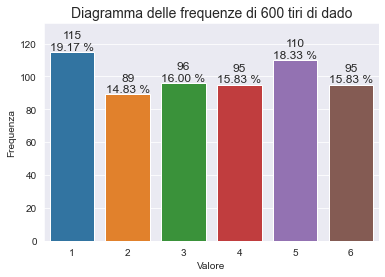

In [9]:
# imposto lo stile con sfondo grgietto
sns.set_style("darkgrid")

# scrivo la stringa che contiene il titolo
title = f"Diagramma delle frequenze di {len(tiri)} tiri di dado"
# creo l'oggetto axes, il digramma vero e proprio
axes = sns.barplot(x=valori, y=frequenza)

# metto su axes il titolo
axes.set_title(title, fontsize = 14)

# metto le etichette sull'asse x e sull'asse y
axes.set(xlabel = "Valore", ylabel = "Frequenza" )

# alzo il limite massimo sull'asse y per farci stare alcune informazioni sulla
axes.set_ylim(top = max(frequenza) * 1.15)

# per ciascun rettangolo (axes.patches) e ciascuna frequenza ad esso associata (frequenza_bar) nel diagramma (axes):
for bar, frequenza_bar in  zip(axes.patches, frequenza):
    # recupera la posizione x del centro del rettangolo
    x_text = bar.get_x() + bar.get_width()/2
    # bar.get_x() e' il punto in basso a sinistra del diagramma
    # a cui sommo mezza larghezza della barra
    # recupero la posizione y del testo, ovvero sopra alla barra:
    y_text = bar.get_y() + bar.get_height()
    # bar.get_y() e' il punto piu' basso del rettangolo, a cui sommo l'altezza del rettangolo stesso "bar.get_height()"

    # Il testo da scrivere sopra a ciascuna barra e' il numero di occorrenza (che ricavvo da "get_height")
    # e la percentuale (che ricavo, dal get_height, diviso per il numero dei tiri, in percentuale:
    text = f"{bar.get_height():.0f}\n{100*bar.get_height()/len(tiri):.2f} %"

    # Stampa sul diagramma il testo (axes.text(...))
    axes.text(x_text, y_text, text,
             ha = "center", # allinea il testo al centro orizzontalmente
             va = "bottom", # allinea il testo in basso verticalmente
             fontsize = 12  # imposto le dimensioni del carattere del text
             )

# mostra il diaramma a video (necessario su configurazioni non IPython)
plt.show()

In [10]:
# Salvo con un magic command di IPython (Jupyter) le celle dalla 1 alla 5 nel file diagramma.py

%save diagramma.py 1-9

The following commands were written to file `diagramma.py`:
# Da eseguire solo se necessara istallazione della libreria, in generale alla prima esecuzione
# Il punto esclamativo sulle celle di IPython (Jupyter Nb) esegue un comando sul Terminale

# !pip install matplotlib
# !pip install numpy
# !pip install seaborn
# Le librerie standard di python che ci serviranno in questo progetto:
import random
import collections

# Le librerie dei framework specifici:
import matplotlib.pyplot as plt # Motore grafico di python per realizzare diagrammi e fuznoni
import numpy as np # Libreria che gestisce ad altissima efficienza gli array
import seaborn as sns # Libreria che usa il motore grafico di MatplotLib con funzionalita' grafiche avanzate
# Tiriamo un dado "n" volte e salviamo i risultati in una lista

n_tiri = 600
# Usiamo la list_comprehension per costruire una lista
# di numeri casuali lunga n_tiri:
# tiri = [genera un numero casuale per j che va da 0 al numero di tiri]
tiri = [random.randr